<h1 align="center"><font size="5">Capstone Project</font></h1>

### Prediction of Road Accident Severity in Rainy Weather

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [9]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [10]:
#download csv file containing data
!wget -O data_collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-01 05:27:47--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘data_collisions.csv’

100%[======================================>] 73,917,638  34.2MB/s   in 2.1s   

2020-09-01 05:27:49 (34.2 MB/s) - ‘data_collisions.csv’ saved [73917638/73917638]



In [11]:
#create a dataframe using csv file
df = pd.read_csv('data_collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [12]:
#check severity value counts of initial data
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [13]:
# Clean up data by dropping unwanted columns
dataset = df.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'])
dataset.shape

(194673, 4)

In [14]:
#Extract data corresponding to rainy weather
rain_data = dataset[(dataset['WEATHER'] == 'Raining')].copy()
rain_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
1,1,Raining,Wet,Dark - Street Lights On
4,2,Raining,Wet,Daylight
6,1,Raining,Wet,Daylight
12,1,Raining,Wet,Dark - Street Lights On
13,1,Raining,Wet,Dark - No Street Lights


In [15]:
rain_data['SEVERITYCODE'].value_counts()

1    21969
2    11176
Name: SEVERITYCODE, dtype: int64

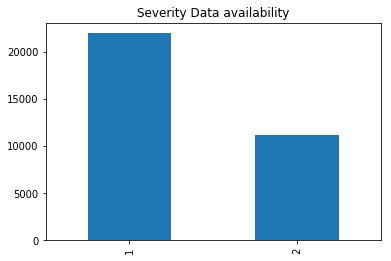

In [16]:
#Raw unbalanced data
severity_unbalanced = rain_data['SEVERITYCODE'].value_counts().plot(kind='bar',title="Severity Data availability")

In [17]:
#Convert column with string values to category
rain_data["WEATHER"] = rain_data["WEATHER"].astype('category')
rain_data["ROADCOND"] = rain_data["ROADCOND"].astype('category')
rain_data["LIGHTCOND"] = rain_data["LIGHTCOND"].astype('category')

rain_data['CATEGORY_WEATHER'] = rain_data['WEATHER'].astype('category').cat.codes
rain_data['CATEGORY_ROADCOND'] = rain_data['ROADCOND'].astype('category').cat.codes
rain_data['CATEGORY_LIGHTCOND'] = rain_data['LIGHTCOND'].astype('category').cat.codes
rain_data.reset_index().head()

,index,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,CATEGORY_WEATHER,CATEGORY_ROADCOND,CATEGORY_LIGHTCOND
0,1,1,Raining,Wet,Dark - Street Lights On,0,8,2
1,4,2,Raining,Wet,Daylight,0,8,5
2,6,1,Raining,Wet,Daylight,0,8,5
3,12,1,Raining,Wet,Dark - Street Lights On,0,8,2
4,13,1,Raining,Wet,Dark - No Street Lights,0,8,0


In [18]:
from sklearn.utils import resample
#Majority class downsampling
rain_data_adjusted = resample(rain_data[rain_data.SEVERITYCODE==1],replace=False,
                              n_samples=11176,random_state=123)
# combining downsampled majority class with minority class
rain_data_balanced = pd.concat([rain_data_adjusted, rain_data[rain_data.SEVERITYCODE==2]])
rain_data_balanced.SEVERITYCODE.value_counts()

2    11176
1    11176
Name: SEVERITYCODE, dtype: int64

In [19]:
rain_data_balanced.SEVERITYCODE.value_counts()

2    11176
1    11176
Name: SEVERITYCODE, dtype: int64

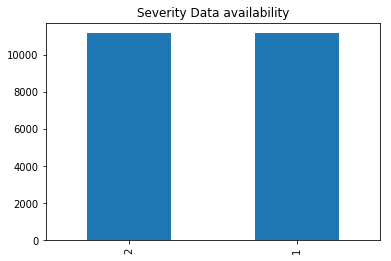

In [20]:
severity_balanced = rain_data_balanced['SEVERITYCODE'].value_counts().plot(kind='bar',title="Severity Data availability")